In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import r2_score
from statsmodels.api import OLS
import statsmodels.api as sm
import helper_functions1 as hf

In [ ]:
# load dataframe 
bikes_df = pd.read_pickle('cleaned_data/bikes_regression.pkl')

In [3]:
# intialize bikes_df class
bikes = hf.BikeLinearRegression(bikes_df, 'cnt')
# Define the Problem
target, x_cols = bikes.target_features()

In [4]:
# split data into train and test, 20% test, 80% train 
X_train, X_test, y_train, y_test = train_test_split(
    x_cols, target, test_size=0.2, random_state=42)

In [5]:
# check for initial model without any tuning or cross validation 
reg_1 = LinearRegression().fit(X_train, y_train)
y_pred_1 = reg_1.predict(X_test)
print('reg_1_train:', reg_1.score(X_train,y_train))
print('reg_1_test:', r2_score(y_test, y_pred_1))


In [6]:
# use statsmodel to test for p values 
results_stats = bikes.stats_models(X_train,y_train)
print ('adjusted R2:', results_stats.rsquared_adj)

adjusted R2: 0.8252264595608264


In [7]:
# check for predicted r2 
bikes.stats_pred(X_train,y_train,X_test,y_test)

0.8143355841672658

In [8]:
top_10_stat1, bottom_5_stat1 = bikes.stats_top_bottom_features(
    X_train, y_train, 'stats1')

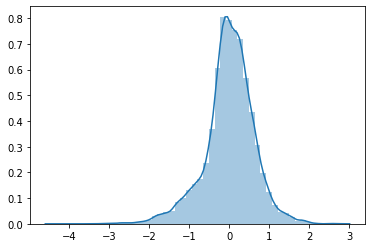

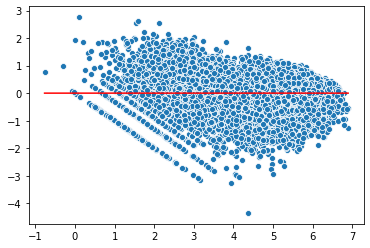

In [9]:
# check to see if residual is normally distribution 
# homoscedasticty 
bikes.normality_homoscedasticity(X_train,y_train)

In [10]:
# remove high p value and see how it affects results 
columns_high_p= results_stats.pvalues[results_stats.pvalues > 0.05].index
X_colsremoved= X_train.drop(columns=columns_high_p)
X_pred_colsremoved = X_test.drop(columns=columns_high_p)

In [11]:
results_stats2 = bikes.stats_models(X_colsremoved,y_train)
print ('adjusted R2:', results_stats2.rsquared_adj)

adjusted R2: 0.8252356100119762


In [12]:
# y_pred_stats_colsremoved= results_stats_colsremoved.predict(X_pred_colsremoved)
# print('reg_stat_test:', r2_score(y_test, y_pred_stats_colsremoved))
# check for predicted r2 
bikes.stats_pred(X_colsremoved,y_train,X_pred_colsremoved,y_test)

0.8144623167846345

In [13]:
top_10_stat2, bottom_5_stat2 = bikes.stats_top_bottom_features(
    X_colsremoved, y_train, 'stats2')

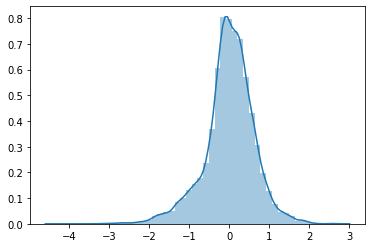

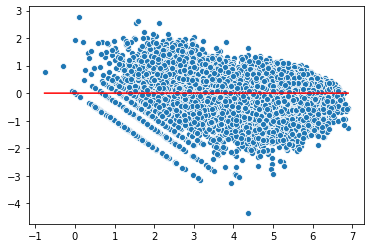

In [14]:
# check for assumptions 
bikes.normality_homoscedasticity(X_colsremoved,y_train)

### Use sklearn lasso, ridge, and linear regression with different alphas:
  * use cross validate of 10
  * use rmse, r2, and mae

In [15]:
# ridge regression , make sure best alpha in alphas
ridge_top10, ridge_bottom5 = bikes.ridge_cv(X_train,y_train,X_test,y_test)

best lambda: 0.2777777777777778
ridge_train: 0.8257271383065374
ridge_test: 0.8143812675009556


In [16]:
# lasso regression , make sure alphas
lasso_top10, lasso_bottom5 = bikes.lasso_cv(X_train,y_train,X_test,y_test)

3.4e-05
lasso_train: 0.8257228773090868
lasso_test: 0.8144289213131726
features removed: 0


In [17]:
# cross validation on linear regression model
bikes.linear_cv()

MAE: 0.47060269568818686
RMSE: 0.6335976403096318
R2: 0.8005550113246647


,MAE,RMSE,r2
0,0.470603,0.633598,0.800555


,stats1,stats2,coef_ridge,coef_lasso
cols,,,,
hr_17,2.173426,2.173149,2.162389,2.161116
hr_18,2.087729,2.086623,2.076683,2.075053
hr_4,-2.029237,-2.029180,-2.037451,-2.039328
hr_8,1.929551,1.929559,1.919301,1.917703
hr_19,1.794587,1.794417,1.783947,1.782447
hr_16,1.782717,1.781586,1.771698,1.769961
hr_3,-1.740398,-1.740357,-1.748745,-1.750439
hr_12,1.587919,1.587675,1.577257,1.575666
hr_9,1.587412,1.587355,1.577168,1.575439


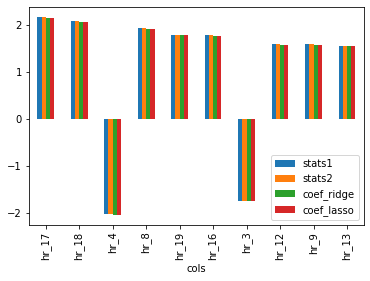

In [23]:
# merge all 4 model features together
dfs_top_10 = [top_10_stat1,top_10_stat2,ridge_top10.set_index('cols'), lasso_top10.set_index('cols')]
bikes.merge_feature_dfs(dfs_top_10,plot=True)

In [19]:
bottom_5_stat1 =  bottom_5_stat1.reset_index()[['index']].rename(columns = {'index':'stats1'})
bottom_5_stat2 = bottom_5_stat2.reset_index()[['index']].rename(columns = {'index':'stats2'})

In [20]:
ridge_5 = ridge_bottom5.reset_index()[['cols']].rename(columns = {'cols':'ridge'})
lasso_5 = lasso_bottom5.reset_index()[['cols']].rename(columns = {'cols':'lasso'})

In [21]:
bottom_5_dfs = [bottom_5_stat1,bottom_5_stat2,ridge_5,lasso_5]
bikes.merge_feature_dfs(bottom_5_dfs)

,stats1,stats2,ridge,lasso
0,weathersit_mist,holiday_not_holiday,weathersit_mist,weekday_Sat
1,weekday_Sat,weathersit_mist,weekday_Sat,workingday_working
2,workingday_working,weekday_Sat,workingday_working,weathersit_mist
3,weekday_Sun,workingday_working,weekday_Sun,weekday_Sun
4,season_summer,weekday_Sun,season_summer,season_summer
